Problem 1  - Perform a classification task with knn from scratch

1.Load the dataset and perform EDA

In [2]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("/content/drive/MyDrive/Worksheet4 dataset/diabetes_.csv")
print(dataframe.shape)
print(dataframe.head())
print(dataframe.columns)
print(dataframe.dtypes)
print(dataframe.describe())
print(dataframe.isnull().sum())


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness            

2. Handling missing data

In [3]:
missing_info = dataframe.isnull().sum() / len(dataframe) * 100
for col in dataframe.columns:
  if missing_info[col]>10:
    dataframe[col].fillna(dataframe[col].median())
  else:
    dataframe.dropna(subset=[col],inplace=True)
print("Data after processing:n", dataframe.head())

Data after processing:n    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3.Feature Engineering

seperating data into test-train split

In [4]:
X = dataframe.drop(columns=["Outcome"]).values
y= dataframe["Outcome"].values

def train_test_split(X, y, test_size=0.3, random_seed=42):
 np.random.seed(random_seed)
 indices = np.arange(X.shape[0])
 np.random.shuffle(indices)
 test_split_size = int(len(X) * test_size)
 test_indices = indices[:test_split_size]
 train_indices = indices[test_split_size:]
 X_train, X_test = X[train_indices], X[test_indices]
 y_train, y_test = y[train_indices], y[test_indices]
 return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Implementing KNN

In [5]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have same dimensions to calculate Euclidean distance")
  distance = np.sqrt(np.sum(point1 - point2) ** 2)
  return distance



function to predict class for single query

In [6]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)[:k]
  nearest_indices=sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

function to predict classes for all test samples

In [7]:
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

Evaluate using accuracy

In [8]:
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [9]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
print("Predictions:", predictions)
unscaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


Problem -2  Experimentation

In [10]:
def min_max_scaling(X):
  min_values = np.min(X, axis=0)
  max_values = np.max(X, axis=0)
  X_scaled = (X - min_values) / (max_values - min_values)
  return X_scaled
X_scaled = min_max_scaling(X)
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)


In [11]:
scaled_predictions = knn_predict(Xscaled_test, Xscaled_train, y_train, k=3)
print("Predictions:", predictions)
scaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


Problem -3 Experiment with different values of k

In [12]:
import matplotlib.pyplot as plt
import time
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  times={}
  for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    accuracy = compute_accuracy(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    accuracies[k] = accuracy
    times[k]=execution_time
    print(f"Accuracy for k={k} is {accuracy:.2f}%")
    print(f"Time for k = {k} is {execution_time:.3f}seconds")
  return accuracies, times
k_values = range(1,16)
print("For unscaled data")
accuracy_unscaled, time_unscaled= experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
print("For scaled data")
accuracy_scaled, time_scaled= experiment_knn_k_values(Xscaled_train, y_train, Xscaled_test, y_test, k_values)


For unscaled data
Accuracy for k=1 is 60.00%
Time for k = 1 is 0.913seconds
Accuracy for k=2 is 63.91%
Time for k = 2 is 1.256seconds
Accuracy for k=3 is 61.74%
Time for k = 3 is 1.352seconds
Accuracy for k=4 is 66.96%
Time for k = 4 is 1.135seconds
Accuracy for k=5 is 64.35%
Time for k = 5 is 0.713seconds
Accuracy for k=6 is 64.35%
Time for k = 6 is 0.735seconds
Accuracy for k=7 is 65.65%
Time for k = 7 is 0.715seconds
Accuracy for k=8 is 66.52%
Time for k = 8 is 0.679seconds
Accuracy for k=9 is 67.39%
Time for k = 9 is 0.821seconds
Accuracy for k=10 is 67.83%
Time for k = 10 is 0.706seconds
Accuracy for k=11 is 66.96%
Time for k = 11 is 0.813seconds
Accuracy for k=12 is 66.52%
Time for k = 12 is 0.739seconds
Accuracy for k=13 is 68.26%
Time for k = 13 is 0.704seconds
Accuracy for k=14 is 66.09%
Time for k = 14 is 0.707seconds
Accuracy for k=15 is 66.96%
Time for k = 15 is 0.677seconds
For scaled data
Accuracy for k=1 is 61.74%
Time for k = 1 is 0.700seconds
Accuracy for k=2 is 66.96%

Visualizing the results

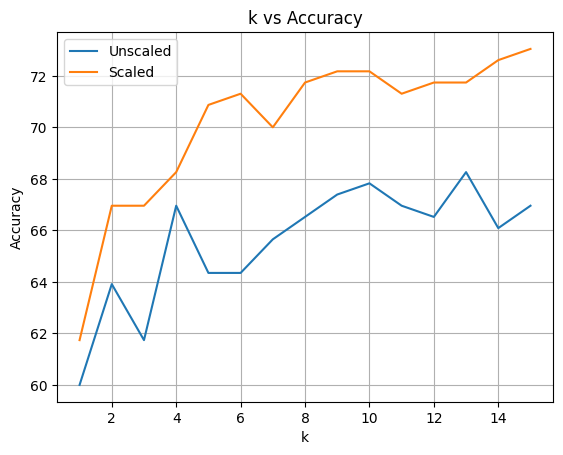

In [13]:
plt.figure()
plt.plot(k_values, accuracy_unscaled.values(), label="Unscaled")
plt.plot(k_values, accuracy_scaled.values(),  label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()


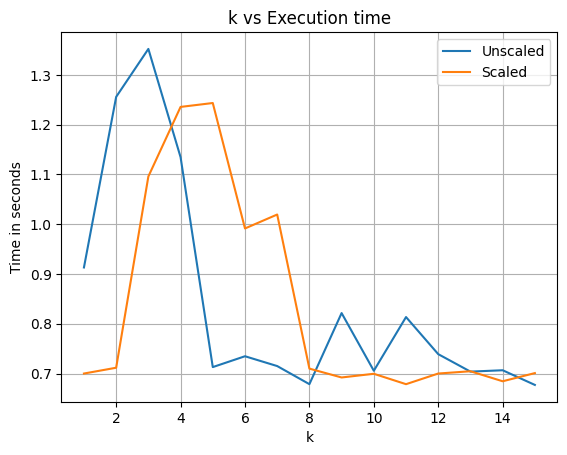

In [14]:
plt.figure()
plt.plot(k_values, time_unscaled.values(), label="Unscaled")
plt.plot(k_values, time_scaled.values(),  label="Scaled")
plt.xlabel("k")
plt.ylabel("Time in seconds")
plt.title("k vs Execution time")
plt.legend()
plt.grid()
plt.show()


Analyze and discuss

- Discuss how the choice of k affects the accuracy and computational cost.

- Identify the optimal k based on your analysis.

The choice of K plays a vital role on affecting the accuracy and computational cost. It is measured by checking whether its small or large.

If K is too small, it can cause overfitting, and incorrect predictions as the model relies on few neighbouring points only. This leads to high variance and low bias.When this happens it results to higher accuracy but can also create small fluctuations or noise in the data.However, this remains the computational cost low as only few number of points needs to be considered.

On the other hand, if K is too large, it can cause underfitting and also lower accuracy as the model may neglect local patterns.It leads to high bias and low variance. This also decreases the contribution of each data points. Hence, computational cost increases as large number of points needs to be considered.

Based on the analysis, a moderate value of k provides a balance between accuracy and efficiency. In this case, k = 10 offers the best overall performance, giving reliable predictions while keeping the computational cost reasonable.

Problem-4

- Discuss the challenges of using KNN for large datasets and high-dimensional data.

- Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

Using KNN for lagre datasets comes with many challanges.
When there is new data point, the algorithm must compute the distance to all points in the training set.As there are large data points this process becomes time consuming and requires special memory making it inefficient.
When there is high-dimensional data, the distance of two data points become less useful and makes and decreases the accuracy of KNN.

Meanwhile, by appling techniques like Principal Component Analysis (PCA) we can reduce dimensionality.It reduces the number of features while retaining the most important information, making the algorithm faster and more reliable.It allows neighbouring points to act more efficiently.
